# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [3]:
#import files
df=pd.read_csv("C:/Users/MY PC/Documents/workspace/Ford.csv")
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2


# Data Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [4]:
df.shape

(17966, 9)

In [5]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [6]:
# Checking for Null values
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [14]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [15]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [18]:
df.transmission.unique()

array(['Automatic', 'Manual', 'Semi-Auto'], dtype=object)

In [19]:
df.transmission.value_counts()

Manual       15518
Automatic     1361
Semi-Auto     1087
Name: transmission, dtype: int64

In [20]:
df.fuelType.unique()

array(['Petrol', 'Diesel', 'Hybrid', 'Electric', 'Other'], dtype=object)

In [21]:
df.fuelType.value_counts()

Petrol      12179
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: fuelType, dtype: int64

# Exploratory Data Analysis

<AxesSubplot:>

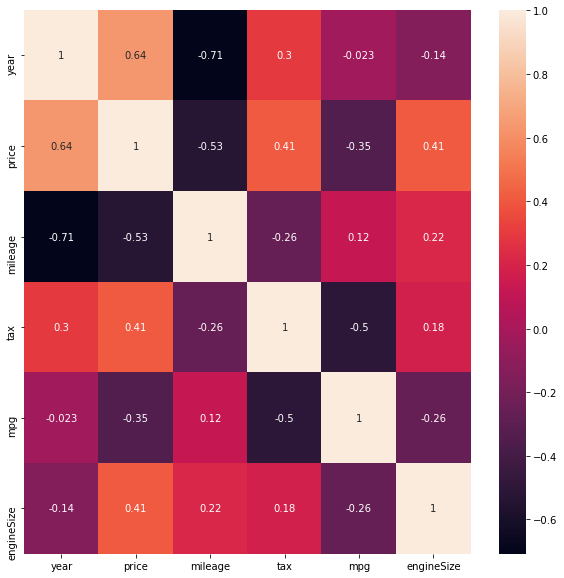

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

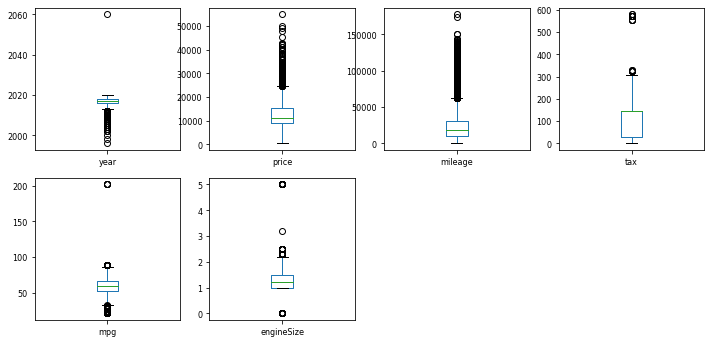

In [25]:
df.plot(kind='box', subplots=True, layout=(4,4), fontsize=8,figsize=(12,12));

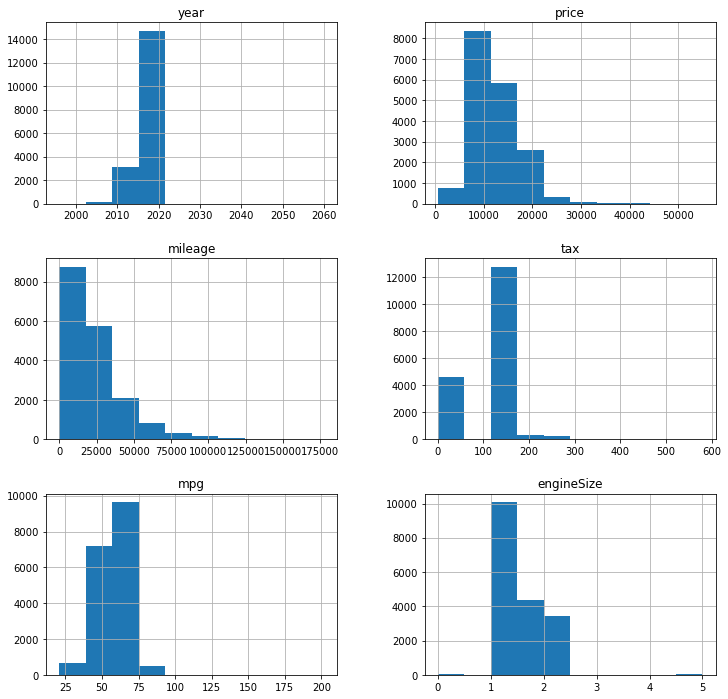

In [30]:
df.hist(figsize=(12,12));

# Univariate Analysis

C:\Users\MY PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


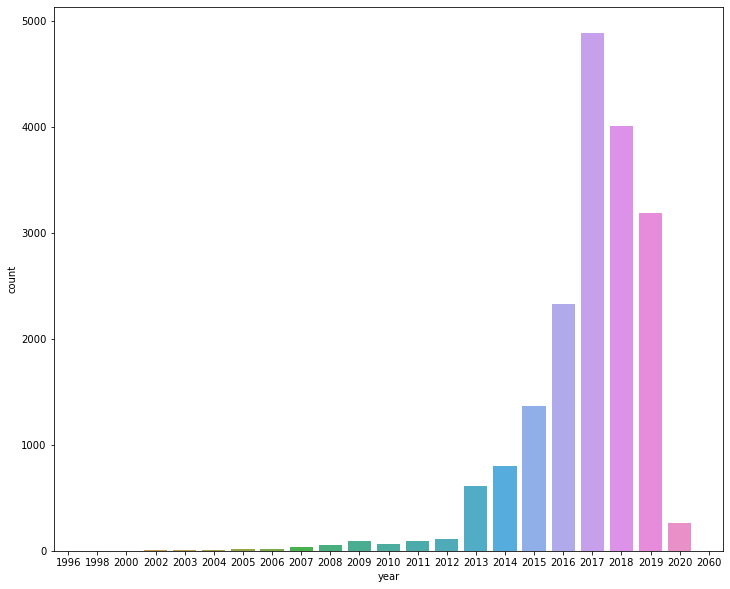

In [39]:
plt.figure(figsize=(12,10))
sns.countplot(df['year']);

C:\Users\MY PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


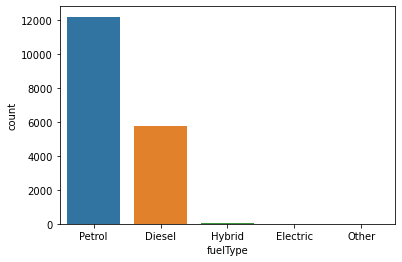

In [32]:
sns.countplot(df['fuelType']);

C:\Users\MY PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


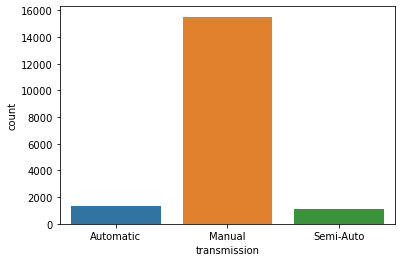

In [33]:
sns.countplot(df['transmission']);

# Bi-Variate Analysis

<AxesSubplot:xlabel='year', ylabel='price'>

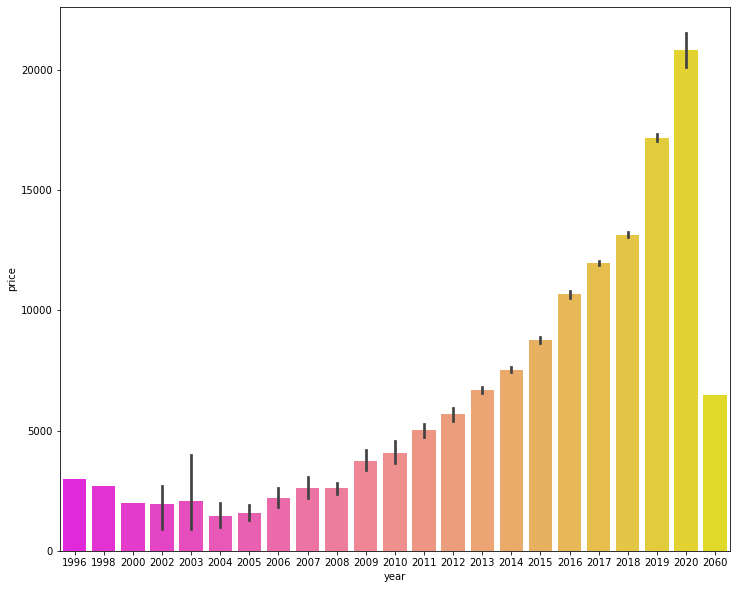

In [38]:
# Price of car per year 
plt.figure(figsize=(12,10))
sns.barplot(data=df, x='year', y='price',palette='spring')

<AxesSubplot:xlabel='fuelType', ylabel='price'>

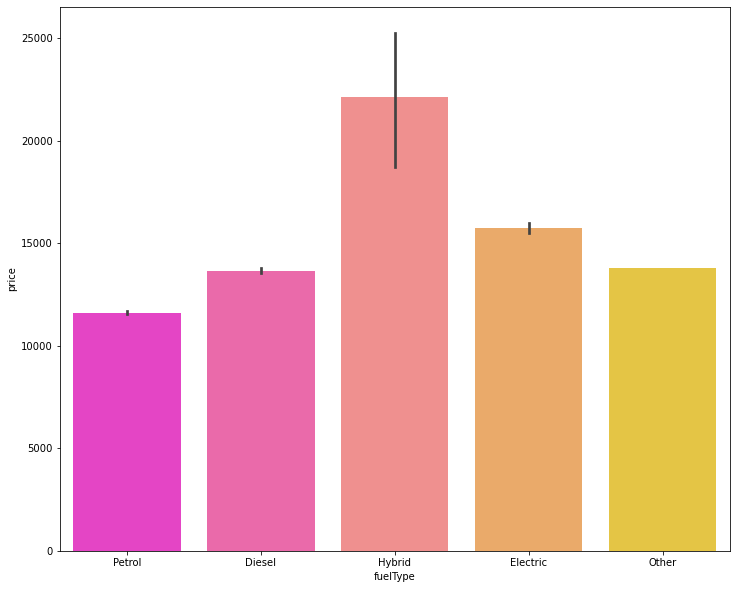

In [40]:
# Price of car per fuel_type 
plt.figure(figsize=(12,10))
sns.barplot(data=df, x='fuelType', y='price',palette='spring')

<AxesSubplot:xlabel='transmission', ylabel='price'>

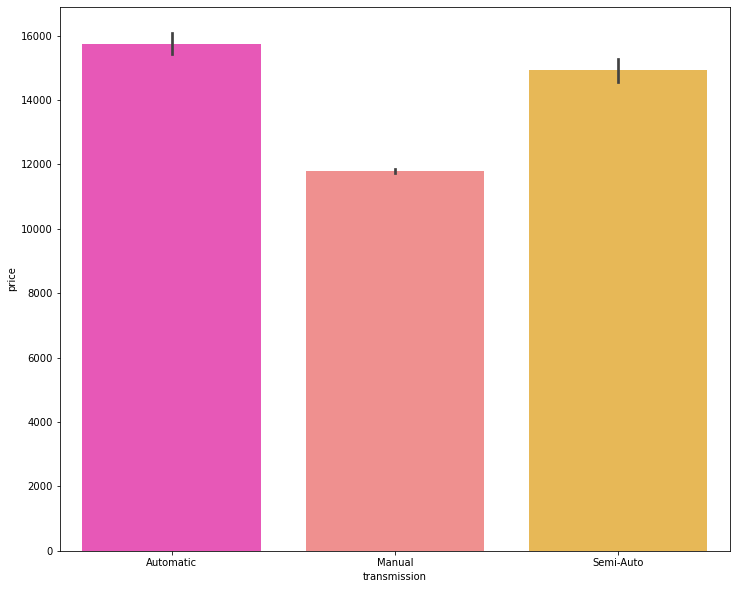

In [41]:
# Price of car based on transmission 
plt.figure(figsize=(12,10))
sns.barplot(data=df, x='transmission', y='price',palette='spring')

<AxesSubplot:xlabel='transmission', ylabel='price'>

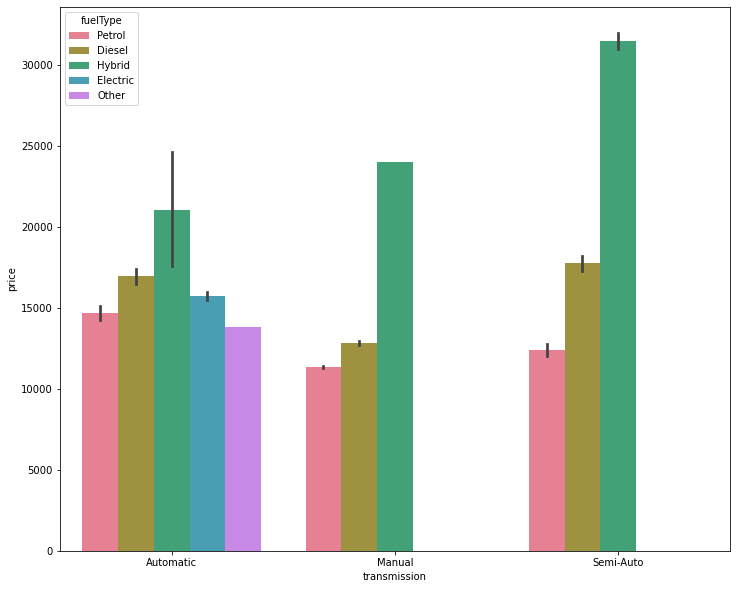

In [43]:
# Price of car based on transmission 
plt.figure(figsize=(12,10))
sns.barplot(data=df, x='transmission', y='price',hue='fuelType',palette='husl')

<AxesSubplot:xlabel='year', ylabel='mileage'>

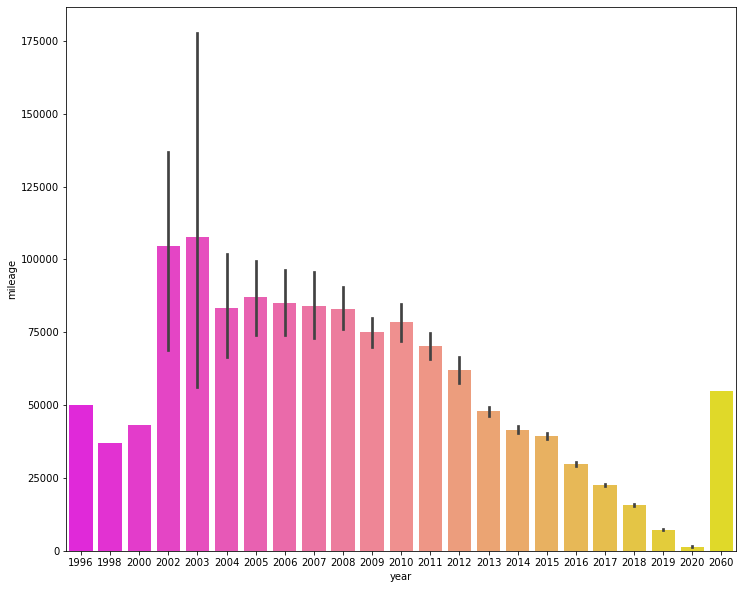

In [44]:
# Price of car based on transmission 
plt.figure(figsize=(12,10))
sns.barplot(data=df, x='year', y='mileage',palette='spring')

In [45]:
df.year.value_counts()

2017    4888
2018    4014
2019    3194
2016    2331
2015    1368
2014     805
2013     609
2020     258
2012     115
2011      94
2009      91
2010      67
2008      57
2007      32
2005      16
2006      13
2004       4
2003       3
2002       3
1996       1
2060       1
1998       1
2000       1
Name: year, dtype: int64

In [4]:
# copy the dataset
df1=df.copy()

In [5]:
df1

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2


# Seperating categorical variabhle from numerical vcariable

In [9]:
numerical_var=df1.select_dtypes(include=[np.number])
categorical_var=df1.select_dtypes(exclude=[np.number])

In [10]:
categorical_var

,model,transmission,fuelType
0,Fiesta,Automatic,Petrol
1,Focus,Manual,Petrol
2,Focus,Manual,Petrol
3,Fiesta,Manual,Petrol
4,Fiesta,Automatic,Petrol
...,...,...,...
17961,B-MAX,Manual,Petrol
17962,B-MAX,Manual,Petrol
17963,Focus,Manual,Diesel
17964,KA,Manual,Petrol


# Remove Outliers

In [11]:
# dealing with outliers using IQR quantile method
Q1=numerical_var.quantile(0.25)
Q3=numerical_var.quantile(0.75)
IQR=Q3-Q1
IQR

year              2.0
price          6300.0
mileage       21073.0
tax             115.0
mpg              13.4
engineSize        0.5
dtype: float64

In [12]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit,upper_limit

(year           2013.00
 price          -451.00
 mileage      -21622.50
 tax            -142.50
 mpg              32.20
 engineSize        0.25
 dtype: float64,
 year           2021.00
 price         24749.00
 mileage       62669.50
 tax             317.50
 mpg              85.80
 engineSize        2.25
 dtype: float64)

In [13]:
#REMOVING THE OUTLIERS FROM THE DATASETS
df2=numerical_var [(numerical_var>lower_limit)&(numerical_var<upper_limit)]
df2

,year,price,mileage,tax,mpg,engineSize
0,2017.0,12000.0,15944.0,150.0,57.7,1.0
1,2018.0,14000.0,9083.0,150.0,57.7,1.0
2,2017.0,13000.0,12456.0,150.0,57.7,1.0
3,2019.0,17500.0,10460.0,145.0,40.3,1.5
4,2019.0,16500.0,1482.0,145.0,48.7,1.0
...,...,...,...,...,...,...
17961,2017.0,8999.0,16700.0,150.0,47.1,1.4
17962,2014.0,7499.0,40700.0,30.0,57.7,1.0
17963,2015.0,9999.0,7010.0,20.0,67.3,1.6
17964,2018.0,8299.0,5007.0,145.0,57.7,1.2


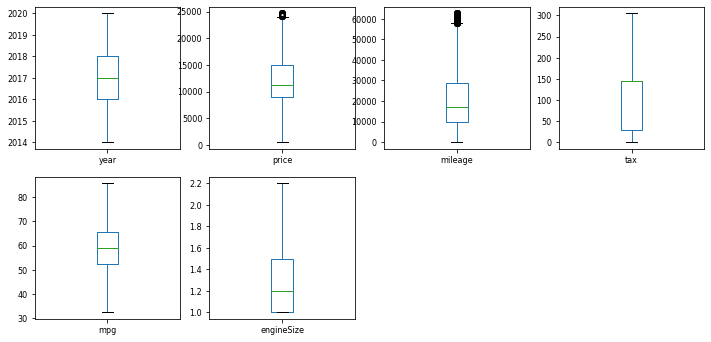

In [72]:
df2.plot(kind='box', subplots=True, layout=(4,4), fontsize=8,figsize=(12,12));

In [38]:
df2['year'].max()

2020.0

In [40]:
df1.year.max()

2060

In [14]:
# Concate both the numerical and categorical columns
data=pd.concat([categorical_var,numerical_var],axis=1)

In [15]:
data

,model,transmission,fuelType,year,price,mileage,tax,mpg,engineSize
0,Fiesta,Automatic,Petrol,2017,12000,15944,150,57.7,1.0
1,Focus,Manual,Petrol,2018,14000,9083,150,57.7,1.0
2,Focus,Manual,Petrol,2017,13000,12456,150,57.7,1.0
3,Fiesta,Manual,Petrol,2019,17500,10460,145,40.3,1.5
4,Fiesta,Automatic,Petrol,2019,16500,1482,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,Manual,Petrol,2017,8999,16700,150,47.1,1.4
17962,B-MAX,Manual,Petrol,2014,7499,40700,30,57.7,1.0
17963,Focus,Manual,Diesel,2015,9999,7010,20,67.3,1.6
17964,KA,Manual,Petrol,2018,8299,5007,145,57.7,1.2


In [48]:
data.columns

Index(['model', 'transmission', 'fuelType', 'year', 'price', 'mileage', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [16]:
# Data Transformation

data.replace({'transmission':{'Automatic':0,'Manual':1, 'Semi-Auto':2}}, inplace=True)
data.replace({'fuelType':{'Petrol':0,'Diesel':1, 'Hybrid':2, 'Electric':3, 'Other':4}}, inplace=True)
data

,model,transmission,fuelType,year,price,mileage,tax,mpg,engineSize
0,Fiesta,0,0,2017,12000,15944,150,57.7,1.0
1,Focus,1,0,2018,14000,9083,150,57.7,1.0
2,Focus,1,0,2017,13000,12456,150,57.7,1.0
3,Fiesta,1,0,2019,17500,10460,145,40.3,1.5
4,Fiesta,0,0,2019,16500,1482,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,1,0,2017,8999,16700,150,47.1,1.4
17962,B-MAX,1,0,2014,7499,40700,30,57.7,1.0
17963,Focus,1,1,2015,9999,7010,20,67.3,1.6
17964,KA,1,0,2018,8299,5007,145,57.7,1.2


# Data Modelling

In [17]:
# seperating the variable from the target variable
# drop both model and price
x=data.drop(['model','price'], axis=1)
y=data['price']

# Standardize the model

In [18]:
# standardize the dataset
sc=StandardScaler()
dataset=sc.fit_transform(x)
standard_data=pd.DataFrame(dataset,columns=x.columns)

In [19]:
x=standard_data
y=data['price']

In [20]:
# Splitting data into train and test

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.30,random_state=42)
print(x.shape, x_train.shape, x_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(17966, 7) (12576, 7) (5390, 7)
(17966,) (12576,) (5390,)


# linear Regression

In [21]:
# Load Model
from sklearn.metrics import mean_absolute_error
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [22]:
# Prediction on training data

from sklearn import metrics
training_data_pred=model.predict(x_train)

# R2 score on test data
score1=metrics.r2_score(y_train,training_data_pred)

# mean absolute
mean_abs=metrics.mean_absolute_error(y_train,training_data_pred)

print('R2 score on test data :', score1)
print('Mean absolute error :', mean_abs)

R2 score on test data : 0.738595413241653
Mean absolute error : 1737.17794137283


In [23]:
# Prediction on test data

from sklearn import metrics
testing_data_pred=model.predict(x_test)

# R2 score on test data
score1=metrics.r2_score(y_test,testing_data_pred)

# mean absolute
mean_abs=metrics.mean_absolute_error(y_test,testing_data_pred)

print('R2 score on test data :', score1)
print('Mean absolute error :', mean_abs)

R2 score on test data : 0.7300210047495992
Mean absolute error : 1771.910204329804


In [24]:
# Checking the mean sqaured error
mse=metrics.mean_squared_error(y_test, testing_data_pred)
print(mse)

6143165.062573095


# Random Forest Regressor

In [25]:
acc = []
model = []

In [26]:
RF = RandomForestRegressor()
RF.fit(x_train,y_train)

predicted_values = RF.predict(x_test)

x1 = metrics.r2_score(y_test, predicted_values)
acc.append(x1)
model.append('RF')
#print("RF's Accuracy is: ", x1)

# mean absolute
mean_abs=metrics.mean_absolute_error(y_test,predicted_values)

print('R2 score on test data :', x1)
print('Mean absolute error :', mean_abs)

#print(classification_report(y_test,predicted_values))

R2 score on test data : 0.9019183510035422
Mean absolute error : 983.9466448338407


In [27]:
mse=metrics.mean_squared_error(y_test, predicted_values)
print(mse)

2231772.7304517115


Text(0.5, 1.0, 'Prices vs Predicted prices')

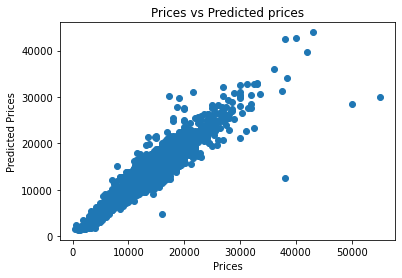

In [128]:
plt.scatter(y_test, predicted_values)
plt.xlabel('Prices')
plt.ylabel('Predicted Prices')
plt.title('Prices vs Predicted prices')

# Making Prediction

In [142]:
# Making Prediction
input_data=(1,0,2018,9083,150,57.7,1.0)
# changing the input into many array
input_changed=np.array(input_data).reshape(1,-1)

# standardize the input
std_input=sc.transform(input_changed)

prediction=RF.predict(std_input)
print(prediction)

print('This Car price is estimation is :', prediction)

[13594.52]
This Car price is estimation is : [13594.52]


In [ ]:
1,0,2018,9083,150,57.7,1.0